# References useful for us

 https://www.sea-stat.com/wp-content/uploads/2021/05/Yves-Hilpisch-Python-for-Finance_-Mastering-Data-Driven-Finance-Book-OReilly-2018.pdf

https://arxiv.org/pdf/2107.13148v1.pdf

# Setup


## Common setup

In [ ]:
# Ignore Future warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Install necessary libraries
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tqdm
!pip install beautifulsoup4
!pip install yfinance
!pip install catboost
!pip uninstall -y community
!pip install python-louvain
!pip install networkx==3.0
!pip install requests
!pip install sklearn
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.3 MB/s eta 0:00:00
     

## Google Colab setup

In [1]:
# Run for mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Project path for Google Colab
project_path = 'gdrive/MyDrive/fin_big_data'

In [ ]:
# Add path for Google Colab
import sys
import os

sys.path.append(os.path.join('content', project_path))

In [ ]:
# Move to project root dir
%cd -q $project_path

Optional cell for creating requirements.txt file

In [ ]:
# Generate requirements.txt file
!pip install pipreqs
!pipreqs . 

## Jupyter Notebook setup
**Important**: Run this section ONLY if using Jupyter Notebook! However, you may encounter libraries incompatibilities.

In [ ]:
import os 

# Project path for Jupyter Notebook
project_path = 'fin_big_data'

In [ ]:
# Move to project root dir
%cd -q $project_path

In [ ]:
# Install libraries from requirements.txt file
!pip install -r requirements.txt

# Implementation

## Variable declaration

In [ ]:
# Define and create data directory (if it does not exist)
data_dir = 'data'
if not os.path.exists(data_dir):
   os.makedirs(data_dir)

# Website URL of top 100 performing stocks
website_url = 'https://www.tradingview.com/markets/stocks-usa/market-movers-active/'

# Path for saving or loading the raw data
raw_data_path = os.path.join(data_dir, 'raw_data.csv')

# Path for saving or loading the processed data 
processed_data_path = os.path.join(data_dir, 'processed_data.csv')

# Define and create figures directory (if it does not exist)
figures_path = 'figures'
if not os.path.exists(figures_path):
   os.makedirs(figures_path)

# Define and create models directory (if it does not exist)
models_path = 'models'
if not os.path.exists(models_path):
   os.makedirs(models_path)

## Raw data creation or loading

In [ ]:
from create_data import get_best_stock_names, get_stock_data, convert_size

# Create raw stock dataframe
raw_df = get_stock_data(raw_data_path, website_url)

# Compute size of dataframe
print("Size of the dataframe is {}".format(convert_size(raw_df.memory_usage(index=True).sum())))

# Show first rows of dataframe
raw_df.head()

Size of the dataframe is 55.21 MB


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,year,month,day
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,TSLA,2010,6,29
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,TSLA,2010,6,30
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,TSLA,2010,7,1
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,TSLA,2010,7,2
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,TSLA,2010,7,6


## Data visualization

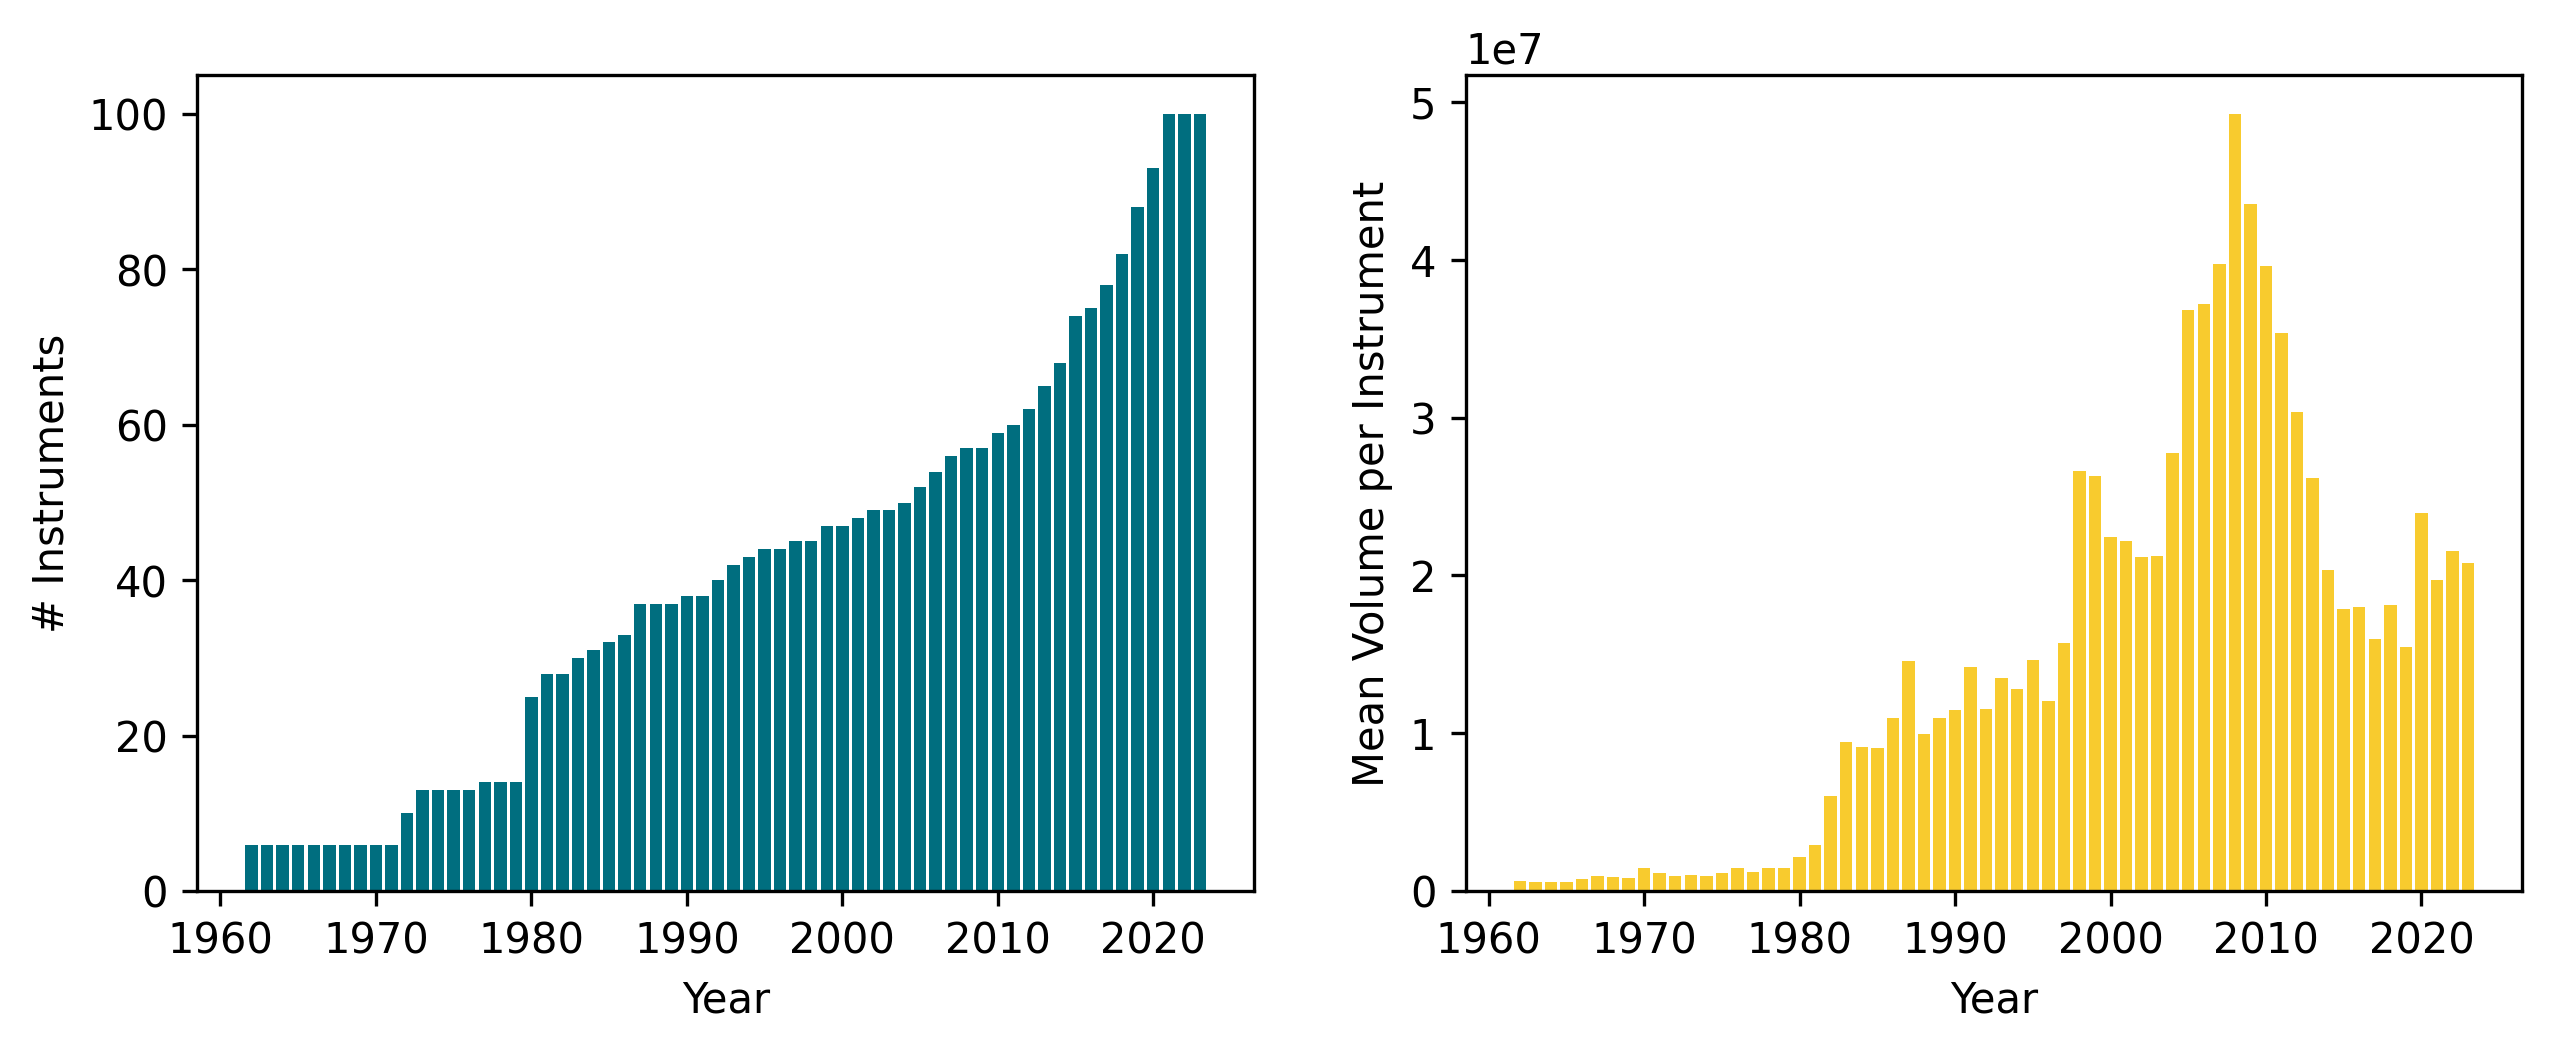

In [ ]:
from visualization import viz_dataset

# Plot info about dataset
viz_dataset(raw_df, figures_path)

## Processed data creation or loading

In [ ]:
from create_data import get_processed_data

# Create the processed data (features and target columns added)
df = get_processed_data(processed_data_path, raw_df)

## Clustering

In [ ]:
from clustering import add_clusters

# Perform clustring and add clusters as feature
df = add_clusters(df, show=False)
df.head()

Data shape for clustering is (288, 85)
Total number of clusters: 4
3    39
0    34
2    10
1     2
dtype: int64


,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,...,Previous_Volume,ATR,MACD_12_26,K,D,MFI,RSI,Target_Move,Returns,Cluster
0,106,1962-06-04,1.297982,1.312766,1.292069,1.295026,79900,0.0,0.0,AA,...,76904.0,0.031974,-0.039598,69.230597,70.256305,63.153297,48.364522,True,0.006849,2
1,107,1962-06-05,1.295026,1.324593,1.292069,1.303896,58926,0.0,0.0,AA,...,79900.0,0.032524,-0.035664,78.688203,72.895987,61.960302,51.880587,True,0.013606,2
2,108,1962-06-06,1.312767,1.324593,1.312767,1.321636,35955,0.0,0.0,AA,...,58926.0,0.030623,-0.030760,98.181758,82.033519,70.594743,58.035440,False,-0.020135,2
3,109,1962-06-07,1.315723,1.315723,1.292069,1.295026,23970,0.0,0.0,AA,...,35955.0,0.031045,-0.028690,81.817873,86.229278,74.331653,48.097584,True,0.013699,2
4,110,1962-06-08,1.295026,1.315723,1.292070,1.312767,40949,0.0,0.0,AA,...,23970.0,0.032101,-0.025326,92.727300,90.908977,79.356117,53.779960,False,-0.011262,2


## Input Preparation

Select the feature columns

In [ ]:
feature_cols = ['OBV', 'AD', 'MFM', 'MACD_12_26', 'Volume', 'Previous_Volume',
                'K', 'D', 'EMA', 'ATR', 'RSI', 'MFI', 'Cluster']

# Only the numerical columns, without the categorical ones
cols_without_cat = feature_cols[:-1]

Select the target column

In [ ]:
target_col = 'Target_Move'

Train-Test split

In [ ]:
import pandas as pd

sorted_df = df.sort_values('Date')
sorted_df['Date'] = pd.to_datetime(sorted_df['Date'])
X_train = sorted_df[sorted_df['Date'].dt.year < 2021][feature_cols + ['Returns', 'Date']]
y_train = sorted_df[sorted_df['Date'].dt.year < 2021][target_col]
X_test = sorted_df[sorted_df['Date'].dt.year >= 2021][feature_cols + ['Returns', 'Date']]
y_test = sorted_df[sorted_df['Date'].dt.year >= 2021][target_col]

Feature Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[cols_without_cat])

MinMaxScaler()

In [ ]:
X_train[cols_without_cat] = scaler.transform(X_train[cols_without_cat])
X_test[cols_without_cat] = scaler.transform(X_test[cols_without_cat])

Feature Selection

Before correlated feature removal, training data has (444213, 15) shape


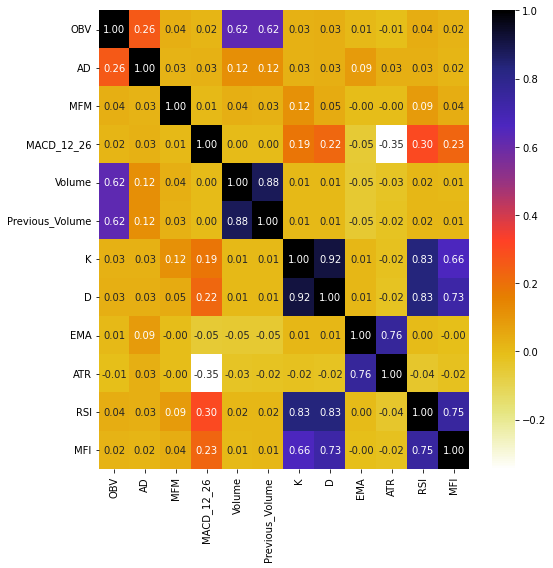

The following columns will be removed: {'D', 'Previous_Volume'}
After correlated feature removal, training data has (444213, 13) shape


In [ ]:
from feature_selection import correlation
import pandas as pd

print("Before correlated feature removal, training data has {} shape".format(X_train.shape))
# Compute most correlated features
corr_features = correlation(X_train[cols_without_cat], 0.85, figures_path=figures_path)
print(f"The following columns will be removed: {corr_features}")

# Drop correlated features
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
for corr_feature in corr_features:
    feature_cols.remove(corr_feature)
    cols_without_cat.remove(corr_feature)

print(f"After correlated feature removal, training data has {X_train.shape} shape")


        Importance_Value
OBV            18.259980
EMA            10.976991
K               4.794085
Volume          2.582902
RSI             1.433653
ATR             1.012607
AD              0.394835
MFI             0.102068


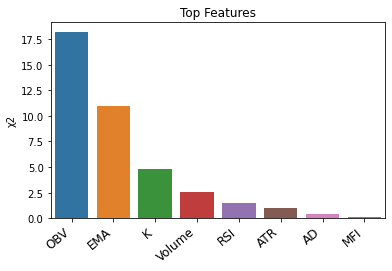

In [ ]:
from feature_selection import select_best_feats

# Select best features
X_train, X_test, cols_without_cat, feature_cols = select_best_feats(X_train, y_train,
                                                                    X_test, feature_cols,
                                                                    cols_without_cat,
                                                                    figures_path)

## Models

In [ ]:
# Dictionary for saving trained model
models = {}

# Parameter for forcing retraining even if saved models exists
# If you DO NOT want to train models from scratch, set to False
force_recompute = False

# Whether to compute feature importance or not
get_feat_importance = False

### MLPClassifier

In [ ]:
from create_models import MLPClassifierModel

# Create model
model_mlp = MLPClassifierModel(models_path, force_recompute, X_train, X_test, y_train, y_test, cols_without_cat)
# Train model
model_mlp.train()
# Save model
models['MLP Classifier'] = model_mlp.trained_model
# Test model
model_mlp.test()

Confusion matrix is: [[13004  9113]
 [12303  8534]]
F1 score is 0.44350899074940237
Accuracy is 0.5014201238534246


### Decision Tree

In [ ]:
from create_models import DecisionTreeModel

# Create model
model_dt = DecisionTreeModel(models_path, force_recompute, X_train, X_test, y_train, y_test, cols_without_cat, get_feat_importance)
# Train model 
model_dt.train()
# Save model
models['Decision Tree'] = model_dt.trained_model
# Test model
model_dt.test()

Confusion matrix is: [[10708 11409]
 [10011 10826]]
F1 score is 0.5026931649331352
Accuracy is 0.5013270009777901


### Logistic Regression

In [ ]:
from create_models import LogisticRegressionModel

# Create model
model_lr = LogisticRegressionModel(models_path, force_recompute, X_train, X_test, y_train, y_test, cols_without_cat, get_feat_importance)
# Train model 
model_lr.train()
# Save model
models['Logistic Regression'] = model_lr.trained_model
# Test model
model_lr.test()

Confusion matrix is: [[17615  4502]
 [16388  4449]]
F1 score is 0.29871089029139253
Accuracy is 0.5136657819993481


### Naive Bayes

In [ ]:
from create_models import NaiveBayesModel

# Create model
model_nb = NaiveBayesModel(models_path, force_recompute, X_train, X_test, y_train, y_test, cols_without_cat, get_feat_importance)
# Train model 
model_nb.train()
# Save model
models['Naive Bayes'] = model_nb.trained_model
# Test model
model_nb.test()

Confusion matrix is: [[21136   981]
 [19885   952]]
F1 score is 0.08361879666227492
Accuracy is 0.5142245192531545


### CatBoost

In [ ]:
from create_models import CatBoostModel

# Create model
model_catb = CatBoostModel(models_path, force_recompute, X_train, X_test, y_train, y_test, cols_without_cat, get_feat_importance)
# Train model 
model_catb.train()
# Save model
models['CatBoost'] = model_catb.trained_model
# Test model
model_catb.test(catboost=True)

Confusion matrix is: [[10433 11684]
 [ 9629 11208]]
F1 score is 0.5126117679343227
Accuracy is 0.5038180379010104


### Catboost with Cluster Information

In [ ]:
from create_models import CatBoostClusterModel

# Create model
model_catb_cluster = CatBoostClusterModel(models_path, force_recompute, X_train, X_test, y_train, y_test, feature_cols, get_feat_importance)
# Train model 
model_catb_cluster.train()
# Save model
models['CatBoost with Cluster Data'] = model_catb_cluster.trained_model
# Test model
model_catb_cluster.test(catboost=True)

Confusion matrix is: [[ 9843 12274]
 [ 9146 11691]]
F1 score is 0.521896343913218
Accuracy is 0.5013270009777901


### Specialized CatBoost per Cluster

In [ ]:
from create_models import SpecializedCatBoostModel

# Create model
models_by_cluster = SpecializedCatBoostModel(models_path, force_recompute,
                                             X_train, X_test, y_train,
                                             y_test, cols_without_cat,
                                             get_feat_importance)
# Train model
models_by_cluster.train()
# Save model
models['Specialized CatBoost per Cluster'] = models_by_cluster
# Test model
models_by_cluster.test()

0:	learn: 0.6923716	total: 31.6ms	remaining: 31.6s
1:	learn: 0.6916696	total: 73.8ms	remaining: 36.8s
2:	learn: 0.6911696	total: 106ms	remaining: 35.1s
3:	learn: 0.6906337	total: 142ms	remaining: 35.3s
4:	learn: 0.6901387	total: 177ms	remaining: 35.3s
5:	learn: 0.6896620	total: 209ms	remaining: 34.7s
6:	learn: 0.6893315	total: 249ms	remaining: 35.3s
7:	learn: 0.6889606	total: 292ms	remaining: 36.2s
8:	learn: 0.6886377	total: 325ms	remaining: 35.8s
9:	learn: 0.6883481	total: 368ms	remaining: 36.4s
10:	learn: 0.6881256	total: 399ms	remaining: 35.9s
11:	learn: 0.6878178	total: 440ms	remaining: 36.2s
12:	learn: 0.6875631	total: 474ms	remaining: 36s
13:	learn: 0.6873104	total: 505ms	remaining: 35.6s
14:	learn: 0.6869640	total: 535ms	remaining: 35.1s
15:	learn: 0.6867770	total: 566ms	remaining: 34.8s
16:	learn: 0.6866162	total: 595ms	remaining: 34.4s
17:	learn: 0.6864821	total: 627ms	remaining: 34.2s
18:	learn: 0.6862654	total: 660ms	remaining: 34.1s
19:	learn: 0.6860852	total: 696ms	remaini

## Backtesting

### Backtesting all of the models

In [ ]:
from visualization import viz_backtest

Score for model Baseline at the end of the period: 361.60321160620026
Score for model MLP Classifier at the end of the period: 101.71900952948404
Score for model Decision Tree at the end of the period: 832.6158224359389
Score for model Logistic Regression at the end of the period: 35.11899757002571
Score for model Naive Bayes at the end of the period: 40.21125458743243
Score for model CatBoost at the end of the period: 1778.079858460158
Score for model CatBoost with Cluster Data at the end of the period: 1725.2513270825239
Score for model Specialized CatBoost per Cluster at the end of the period: 1229.4385826791963


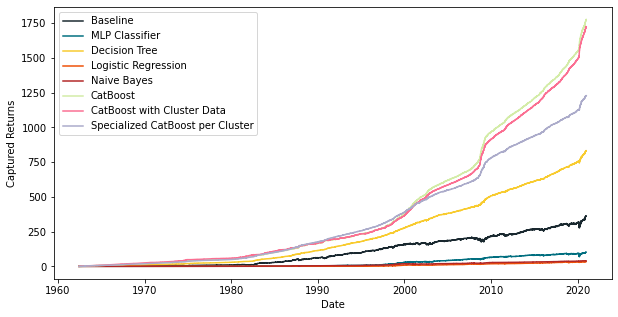

In [ ]:
# Performance of all models on the train set
viz_backtest(X_train, models, cols_without_cat,
             fig_path=os.path.join(figures_path, 'backtest_all_train.jpg'))

Score for model Baseline at the end of the period: 0.26456354742146027
Score for model MLP Classifier at the end of the period: -6.459613284238269
Score for model Logistic Regression at the end of the period: -3.68198555571291
Score for model Naive Bayes at the end of the period: 4.991147175375236


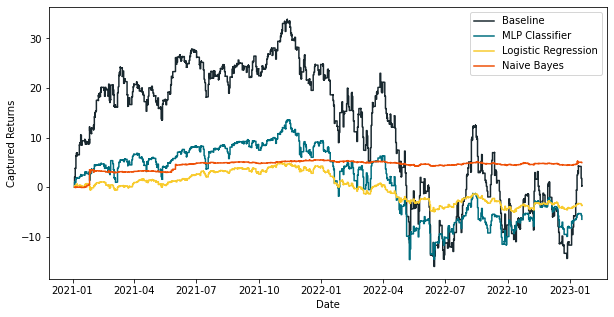

In [ ]:
# Visualize performance on the test set of all non-tree-based models.
viz_backtest(X_test,
             {model_name: models[model_name] for model_name in models if 'CatBoost' not in model_name and 'Tree' not in model_name},
             cols_without_cat,
             fig_path=os.path.join(figures_path, 'backtest_all_non_tree_test.jpg'))

Score for model Baseline at the end of the period: 0.26456354742146027
Score for model Decision Tree at the end of the period: 1.1814981427562172
Score for model CatBoost at the end of the period: 4.232067606499091
Score for model CatBoost with Cluster Data at the end of the period: 8.429133689884601
Score for model Specialized CatBoost per Cluster at the end of the period: 4.516900333664725


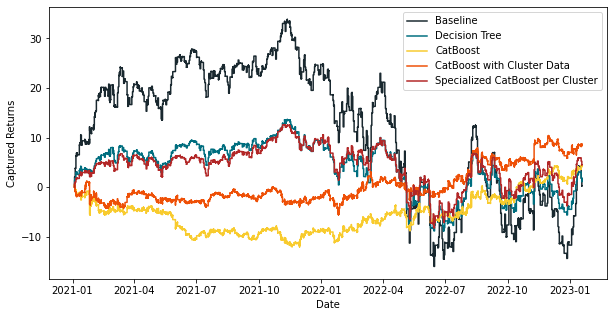

In [ ]:
# Visualize performance on the test set of all tree-based models.
viz_backtest(X_test,
             {model_name: models[model_name] for model_name in models if 'CatBoost' in model_name or 'Tree' in model_name},
             cols_without_cat,
             fig_path=os.path.join(figures_path, 'backtest_all_tree_test.jpg'))

### Zoom-in on CatBoost

CatBoost obtained the best performance of all of the models on the train set, and was the only model with positive captured returns in 2022, while the prices were decreasing. Therefore, we choose to inspect this model in more detail.

The CatBoost model contains the probabilities of each prediction. Therefore, we use these probabilities to create a custom trading strategies, that only sells and buys 10 stocks per day, those with the probabilities that are closest to either 0 (the model is confident that the price will decrease) or 1 (the model is confident that the price will increase). We call this strategy "Selective CatBoost".


In [ ]:
class CatBoostWithProba():
    """
    This class is used to create a custom trading strategy based on the class
    probabilities 
    """
    def __init__(self, model):
        self.model = model
    
    def predict(self, X):
        return(self.model.predict_proba(X)[:, 0])

In [ ]:
catboost_models = {'CatBoost': model_catb.trained_model,
                    'CatBoost with Cluster Data': model_catb_cluster.trained_model,
                    'CatBoost Selective': CatBoostWithProba(model_catb.trained_model),
                    'CatBoost Selective with Cluster Data': CatBoostWithProba(model_catb_cluster.trained_model),
                    'Specialized CatBoost per Cluster': models_by_cluster}

Score for model Baseline at the end of the period: 361.60321160620026
Score for model CatBoost at the end of the period: 1778.079858460158
Score for model CatBoost with Cluster Data at the end of the period: 1725.2513270825239
Score for model CatBoost Selective at the end of the period: 1131.8188667466002
Score for model CatBoost Selective with Cluster Data at the end of the period: 1110.3947243875512
Score for model Specialized CatBoost per Cluster at the end of the period: 1229.4385826791963


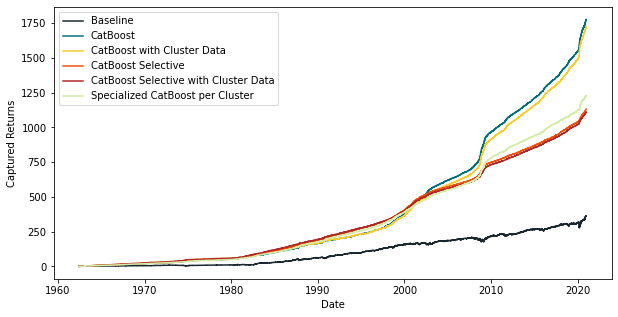

In [ ]:
# Visualize performance on the train set
viz_backtest(X_train, catboost_models, cols_without_cat,
             fig_path=os.path.join(figures_path, 'backtest_catb_train.jpg'),)

Score for model Baseline at the end of the period: 0.26456354742146027
Score for model CatBoost at the end of the period: 4.232067606499091
Score for model CatBoost with Cluster Data at the end of the period: 8.429133689884601
Score for model CatBoost Selective at the end of the period: -0.017206814422732836
Score for model CatBoost Selective with Cluster Data at the end of the period: -6.615925415288512
Score for model Specialized CatBoost per Cluster at the end of the period: 4.516900333664725


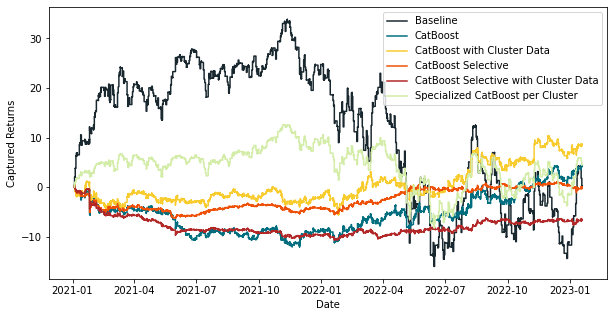

In [ ]:
# Visualize performance on the test set
viz_backtest(X_test, catboost_models, cols_without_cat,
             fig_path=os.path.join(figures_path, 'backtest_catb_test.jpg'),)

### Feature Effect on Predictions

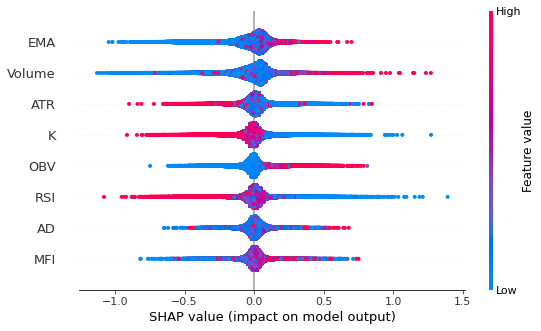

In [ ]:
import shap
import matplotlib.pyplot as plt

# Plot the effect of the features on predictions in the train set.
explainer = shap.TreeExplainer(model_catb.trained_model)
shap_values = explainer.shap_values(X_train[cols_without_cat])
shap.summary_plot(shap_values, X_train[cols_without_cat])

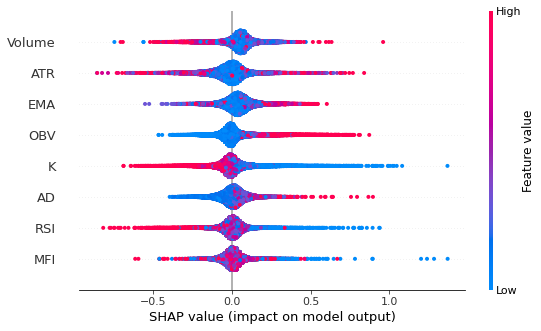

In [ ]:
import shap

# Plot the effect of the features on predictions in the test set.
explainer = shap.TreeExplainer(model_catb.trained_model)
shap_values = explainer.shap_values(X_test[cols_without_cat])
shap.summary_plot(shap_values, X_test[cols_without_cat])